In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Criar FRF a partir do CSV FRF_easy_to_import.xlsx

In [219]:
df = pd.read_excel("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF_easy_to_import.xlsx")

In [220]:
df.columns

Index(['Frequencia', 'Signal 2 (Real)', 'Signal 2 (Imag.)', 'Signal 3 (Real)',
       'Signal 3 (Imag.)', 'Signal 4 (Real)', 'Signal 4 (Imag.)'],
      dtype='object')

In [221]:
print(type(df['Frequencia'][0]))
print(type(df['Signal 2 (Real)'][0]))
print(type(df['Signal 2 (Imag.)'][0]))
print(type(df['Signal 3 (Real)'][0]))
print(type(df['Signal 3 (Imag.)'][0]))
print(type(df['Signal 4 (Real)'][0]))
print(type(df['Signal 4 (Imag.)'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


# Plotando os gráfico das FRF experimentais

In [222]:
freq = df['Frequencia']
print(len(freq))

801


In [223]:
frf_2_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)'])
print(frf_2_andar.shape)

(801,)


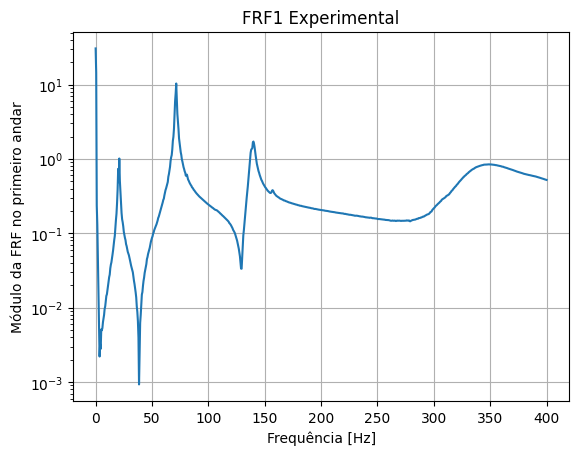

In [224]:
# Plotar gráfico da FRF do primeiro andar
frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_1_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no primeiro andar')
plt.title('FRF1 Experimental')
plt.grid()
plt.yscale('log')
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_andar.png")
plt.show()

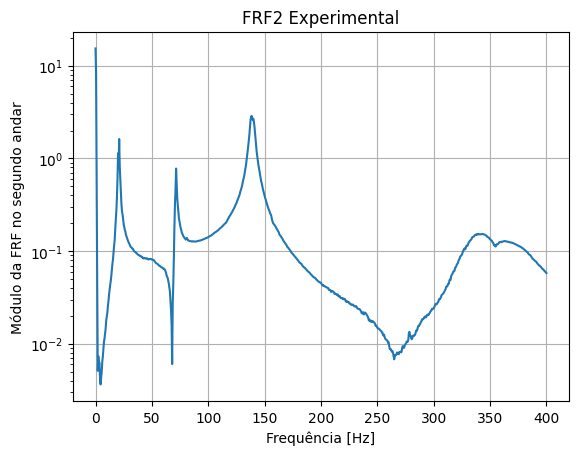

In [225]:
# Plotar gráfico da FRF do segundo andar
frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_2_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no segundo andar')
plt.title('FRF2 Experimental')
plt.grid()
plt.yscale('log')
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_andar.png")
plt.show()

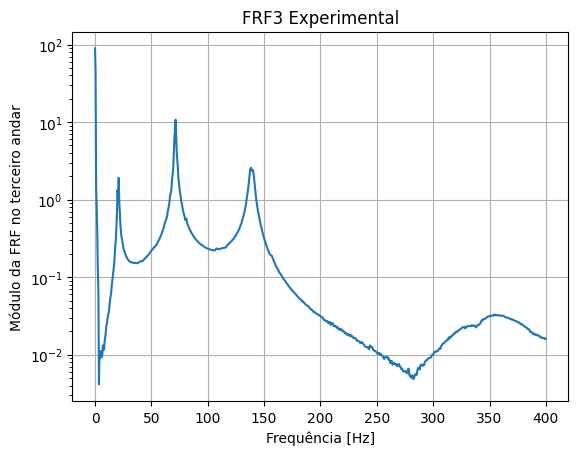

In [226]:
# Plotar gráfico da FRF do terceiro andar
frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_3_andar)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no terceiro andar')
plt.title('FRF3 Experimental')
plt.grid()
plt.yscale('log')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_andar.png")
plt.show()

# Salvando as FRF de cada andar

In [227]:
frf_1_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_1_andar.xlsx')
frf_2_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_2_andar.xlsx')
frf_3_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_3_andar.xlsx')

# Amortecimentos no Primeiro andar

In [228]:
frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) 
freq = df['Frequencia']
print(frf_1_andar.shape)
print(freq.shape)

(801,)
(801,)


In [229]:
w_1 = []
w_2 = []
w_n = []

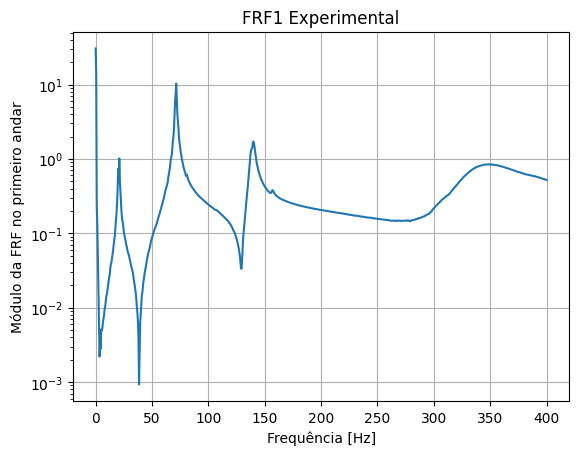

In [230]:
maior = frf_1_andar[2]
cont = 0
for i in range(2, 50):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.0129031
0.7162306506948756
42
21.0


In [231]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [232]:
x = [41*0.5, 21]
y = [0.4875502, 1.0129031]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

print(x_interp)

20.71764460679181


In [233]:
x = [19.5, 20]
y = [0.38753028, 0.73591509]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

# w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.7162306506948756 é aproximadamente: 19.971748998894178


In [234]:
x = [21.5, 21]
y = [0.50667976, 1.0129031]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.7162306506948756 é aproximadamente: 21.29302525769073


In [235]:
print(maior/np.sqrt(2))

0.7162306506948756


In [236]:
maior = frf_1_andar[50]
cont = 0
for i in range(50, 200):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

10.328243
7.303170663042491
143
71.5


In [237]:
x = [70.5, 71]
y = [5.987467, 7.587771]
y_interp = 7.303170663042491

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 7.303170663042491 é aproximadamente: 70.91107928963575


In [238]:
x = [72, 71.5]
y = [6.598632, 10.328243]
y_interp = 7.303170663042491

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 7.303170663042491 é aproximadamente: 71.90554796960829


In [239]:
print(freq[144])
print(frf_1_andar[144])
print(freq[143])
print(frf_1_andar[143])

72.0
6.598632
71.5
10.328243


In [240]:
print(freq[141])
print(frf_1_andar[141])
print(freq[142])
print(frf_1_andar[142])

70.5
5.9874670000000005
71.0
7.587771


In [241]:
print(maior/np.sqrt(2))

7.303170663042491


In [242]:
maior = frf_1_andar[50]
cont = 0
for i in range(200, len(frf_1_andar)):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.7128028
1.2111344747153059
280
140.0


In [243]:
x = [137.5, 138]
y = [1.2081656, 1.3307448]
y_interp = 1.2111344747153059

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.2111344747153059 é aproximadamente: 137.512110026478


In [244]:
print(freq[275])
print(frf_1_andar[275])
print(freq[276])
print(frf_1_andar[276])

137.5
1.2081656
138.0
1.3307448


In [245]:
x = [284*0.5 ,283*0.5]
y = [1.0990418 ,1.2538949]
y_interp = 1.2111344747153059

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.2111344747153059 é aproximadamente: 141.6380677083142


In [246]:
print(freq[284])
print(frf_1_andar[284])
print(freq[283])
print(frf_1_andar[283])

142.0
1.0990418
141.5
1.2538949


In [247]:
print(maior/np.sqrt(2))

1.2111344747153059


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [248]:
print(w_n)
print(w_1)
print(w_2)
q_si = []

[21.0, 71.5, 140.0]
[20.71764460679181, 70.91107928963575, 137.512110026478]
[21.29302525769073, 71.90554796960829, 141.6380677083142]


In [249]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*np.pi

In [250]:
print(w_n)
print(w_1)
print(w_2)

[65.97344572538566, 224.6238747316702, 439.822971502571]
[65.08640009638135, 222.773725754443, 432.0070346388147]
[66.8940117222631, 225.89794125366987, 444.9691129810936]


In [251]:
for i in range(0,3):
    q_si.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do primeiro andar obtido.

In [252]:
q_si

[0.013699539307117047, 0.0069543264333743905, 0.014735563149414927]

# Amortecimentos no Segundo andar

In [253]:
frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) 
freq = df['Frequencia']

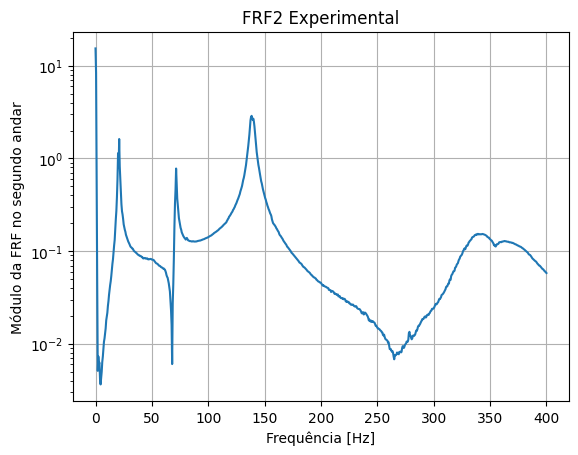

In [254]:
w_n = []
w_1 = []
w_2 = []

In [255]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [256]:
maior = frf_2_andar[2]
cont = 0
for i in range(2, 50):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.6221873
1.1470596401846962
42
21.0


In [257]:
x = [20.5 ,21]
y = [0.7906137 ,1.6221873]
y_interp = 1.1470596401846962

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.1470596401846962 é aproximadamente: 20.714320139663343


In [258]:
print(freq[41])
print(frf_2_andar[41])
print(freq[42])
print(frf_2_andar[42])

20.5
0.7906137
21.0
1.6221873


In [259]:
x = [43*0.5 ,21]
y = [0.82167842 ,1.6221873]
y_interp = 1.1470596401846962

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.1470596401846962 é aproximadamente: 21.296766014522728


In [260]:
print(freq[43])
print(frf_2_andar[43])

21.5
0.82167842


In [261]:
maior = frf_2_andar[50]
cont = 0
for i in range(50, 200):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

0.7791773
0.5509615525766248
143
71.5


In [262]:
x = [71 ,71.5]
y = [0.46226258, 0.7791773]
y_interp = 0.5509615525766248

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.5509615525766248 é aproximadamente: 71.1399413895584


In [263]:
print(freq[142])
print(frf_2_andar[142])
print(freq[143])
print(frf_2_andar[143])

71.0
0.46226258
71.5
0.7791773


In [264]:
x = [72 ,71.5]
y = [0.5430588, 0.7791773]
y_interp = 0.5509615525766248

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.5509615525766248 é aproximadamente: 71.9832652829477


In [265]:
print(freq[144])
print(frf_2_andar[144])

72.0
0.5430588000000001


In [266]:
maior = frf_2_andar[50]
cont = 0
for i in range(200, len(frf_2_andar)):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

2.8845606999999998
2.039692431714214
277
138.5


In [267]:
x = [136.5 ,137]
y = [1.8076991, 2.2046804]
y_interp = 2.039692431714214

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 2.039692431714214 é aproximadamente: 136.79219680084958


In [268]:
print(freq[273])
print(frf_2_andar[273])
print(freq[274])
print(frf_2_andar[274])

136.5
1.8076991
137.0
2.2046804


In [269]:
x = [141.5 ,141]
y = [1.875465, 2.218598]
y_interp = 2.039692431714214

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 2.039692431714214 é aproximadamente: 141.26069420353883


In [270]:
print(freq[283])
print(frf_2_andar[283])
print(freq[282])
print(frf_2_andar[282])

141.5
1.8754650000000002
141.0
2.218598


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [271]:
print(w_n)
print(w_1)
print(w_2)
q_si = []

[21.0, 71.5, 138.5]
[20.714320139663343, 71.1399413895584, 136.79219680084958]
[21.296766014522728, 71.9832652829477, 141.26069420353883]


In [272]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*np.pi

In [273]:
print(w_n)
print(w_1)
print(w_2)

[65.97344572538566, 224.6238747316702, 435.11058252218635]
[65.07595597487345, 223.49271724624512, 429.7453605379582]
[66.90576365644537, 226.14209739431368, 443.7835591508319]


In [274]:
for i in range(0,3):
    q_si.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do segundo andar obtido.

In [275]:
q_si

[0.013867758925223432, 0.005897369883841241, 0.01613175957649553]

# Amortecimentos no Terceiro Andar

In [276]:
frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)'])
freq = df['Frequencia']

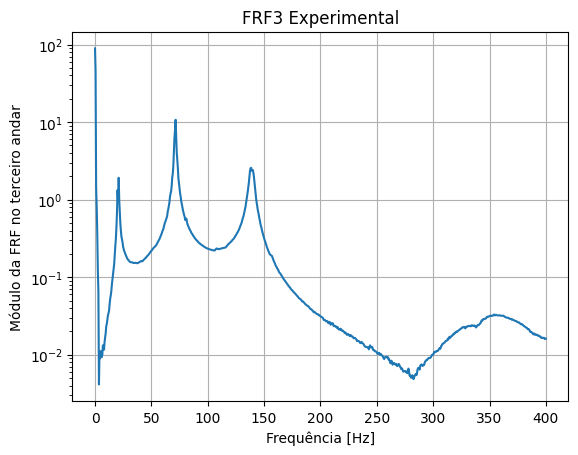

In [277]:
w_n = []
w_1 = []
w_2 = []

In [278]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [279]:
maior = frf_3_andar[2]
cont = 0
for i in range(2, 50):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i
    
w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.9153889
1.3543844797994418
42
21.0


In [280]:
x = [20.5 ,21]
y = [0.9371715 ,1.9153889]
y_interp = 1.3543844797994418

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.3543844797994418 é aproximadamente: 20.713251665631507


In [281]:
print(freq[41])
print(frf_3_andar[41])
print(freq[42])
print(frf_3_andar[42])

20.5
0.9371715
21.0
1.9153889


In [282]:
x = [21.5 ,21]
y = [0.97668325 ,1.9153889]
y_interp = 1.3543844797994418

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.3543844797994418 é aproximadamente: 21.298818069434525


In [283]:
print(freq[43])
print(frf_3_andar[43])

21.5
0.97668325


In [284]:
maior = frf_3_andar[50]
cont = 0
for i in range(50, 200):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

10.731814
7.588538453832727
143
71.5


In [285]:
x = [70.5 ,71]
y = [6.358449 ,8.02145]
y_interp = 7.588538453832727

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 7.588538453832727 é aproximadamente: 70.86984026282387


In [286]:
print(freq[141])
print(frf_3_andar[141])
print(freq[142])
print(frf_3_andar[142])

70.5
6.358449
71.0
8.02145


In [287]:
x = [144*0.5, 143*0.5]
y = [6.819267, 10.731814]
y_interp = 7.588538453832727

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 7.588538453832727 é aproximadamente: 71.90169172998654


In [288]:
print(freq[144])
print(frf_3_andar[144])
print(freq[143])
print(frf_3_andar[143])

72.0
6.819267
71.5
10.731814


In [289]:
maior = frf_3_andar[50]
cont = 0
for i in range(200, len(frf_3_andar)):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

2.5768638
1.8221178671741352
277
138.5


In [290]:
x = [273*0.5, 274*0.5]
y = [1.6704992, 2.0205952]
y_interp = 1.8221178671741352

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.8221178671741352 é aproximadamente: 136.71653870249037


In [291]:
print(freq[273])
print(frf_3_andar[273])
print(freq[274])
print(frf_3_andar[274])

136.5
1.6704992
137.0
2.0205952


In [292]:
x = [141.5, 141]
y = [1.6434072, 1.9572694]
y_interp = 1.8221178671741352

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.8221178671741352 é aproximadamente: 141.21530393406064


In [293]:
print(freq[283])
print(frf_3_andar[283])
print(freq[282])
print(frf_3_andar[282])

141.5
1.6434072
141.0
1.9572694


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [294]:
print(w_n)
print(w_1)
print(w_2)
q_si = []

[21.0, 71.5, 138.5]
[20.713251665631507, 70.86984026282387, 136.71653870249037]
[21.298818069434525, 71.90169172998654, 141.21530393406064]


In [295]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*np.pi

In [296]:
print(w_n)
print(w_1)
print(w_2)

[65.97344572538566, 224.6238747316702, 435.11058252218635]
[65.0725992647045, 222.6441695307696, 429.50767361196836]
[66.91221037708104, 225.88582651960368, 443.64096141369475]


In [297]:
for i in range(0,3):
    q_si.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do terceiro andar obtido.

In [298]:
q_si

[0.01394205723340511, 0.007215744525613047, 0.01624102971686024]

# Obtenção das Massas e Rigidez

In [299]:
#dados do material: Aço 1020

E = 205e9 #módulo de elasticidade e, Pa
rho = 7870 #densidade em kg/m³

#propriedades dos andares--------------------------------------------------------------------------

a = 0.00965 #espessura do andar em m
b = 0.226 #comprimento do andar em m
c = .15180 #largura do andar em m

volume_andar=a*b*c #volume do andar
massa_andar = volume_andar*rho
m_andar = np.array([massa_andar,massa_andar,massa_andar])
print("massa de cada andar = ",round(massa_andar,3),"kg")

#massas adicionadas no experimento ----------------------------------------------------------------------------------

m1 = 1.635 #massa adicionada ao primeiro andar em kg
m2 = 1.187 #massa adicionada ao segundo andar em kg
m3 = 0 #massa adicionada ao terceiro andar em kg
m_adicionada = np.array([m1,m2,m3])

#propridedes da viga ----------------------------------------------------------------------------------------------------------------

#comprimentos
viga1 = 0.12
viga2 = 0.0903
viga3 = 0.0967
L = np.array([viga1,viga2,viga3]) #comprimentos das vigas em metros(Primeiro andar, Segundo andar, Terceiro andar)
print("[Viga1 Viga2 Viga3] = ",L)

#perfil da viga

h = 0.0032 #espessura das vigas no sentido do carregamento
e = 0.04966 #largura das vigas
A_st = h*e #area da seção transversal da viga
I = (e*(h**3))/12 #momento de inércia das vigas em m^4
#print("I =",I)

#massa das vigas

m_viga = np.array([0.0,0,0])

for i in range(len(L)):
  m_viga[i] = 4*((A_st*L[i])*rho)
m_viga[0] = 0
print("m_viga =",m_viga)

#massa final de cada andar ------------------------------------------------------------------------------------------------------

m_total = m_andar + m_adicionada # Essa é com a massa de cada andar 
print("massa total em cada andar =",m_total)

#Modelo considerando viga Engastada guiada -----------------------------------------------------------------------------------------

k_viga = np.array([0.0,0,0])
for i in range(len(k_viga)):                  #calculo da rigidez assossiada a uma viga em cada andar
  k_viga[i] = (12*E*I)/(L[i]**3)

print("k_viga =",k_viga)

#cálculo da frequencia natural ----------------------------------------------------------------------------------
w_n = np.array([0.0,0,0])
for i in range(len(k_viga)):
  w_n[i] = np.sqrt((4*k_viga[i])/m_total[i])

print("w_n =",w_n)

#Modelo considerando viga Engastada livre -----------------------------------------------------------------------------------------

k_viga_livre = np.array([0.0,0,0])                
for i in range(len(k_viga_livre)):                  #calculo da rigidez assossiada a uma viga em cada andar
  k_viga_livre[i] = (3*E*I)/(L[i]**3)

print("k_viga =",k_viga_livre)

#cálculo da frequencia natural ----------------------------------------------------------------------------------
w_n_livre = np.array([0.0,0,0])
for i in range(len(k_viga)):
  w_n_livre[i] = np.sqrt((4*k_viga_livre[i])/m_total[i])

print("w_n_livre =",w_n_livre)

massa de cada andar =  2.605 kg
[Viga1 Viga2 Viga3] =  [0.12   0.0903 0.0967]
m_viga = [0.         0.45173024 0.48374656]
massa total em cada andar = [4.24044708 3.79244708 2.60544708]
k_viga = [193048.65185185 453051.17416247 368919.05625675]
w_n = [426.73430636 691.26387444 752.583014  ]
k_viga = [ 48262.16296296 113262.79354062  92229.76406419]
w_n_livre = [213.36715318 345.63193722 376.291507  ]


# Matriz de Massa

In [300]:
M_matriz = np.zeros([3,3])

Massas de cada andar:

In [301]:
m1 = m_total[0]
m2 = m_total[1]
m3 = m_total[2]

In [302]:
M_matriz[0][0] = m1
M_matriz[1][1] = m2
M_matriz[2][2] = m3
print(M_matriz)

[[4.24044708 0.         0.        ]
 [0.         3.79244708 0.        ]
 [0.         0.         2.60544708]]


# Matriz de Rigidez (K)

In [303]:
K_matriz = np.zeros([3,3])

Rigidez de cada andar, usaremos o k da viga engastada livre

In [304]:
k1 = k_viga_livre[0]
k2 = k_viga_livre[1]
k3 = k_viga_livre[2]

In [305]:
K_matriz[0][0] = (k1 + k2)
K_matriz[0][1] = (-k2)
K_matriz[0][2] = 0
K_matriz[1][0] = (-k2)
K_matriz[1][1] = (k2 + k3)
K_matriz[1][2] = (-k3)
K_matriz[2][0] = 0
K_matriz[2][1] = (-k3)
K_matriz[2][2] = (k3)


In [306]:
K_matriz

array([[ 161524.95650358, -113262.79354062,       0.        ],
       [-113262.79354062,  205492.55760481,  -92229.76406419],
       [      0.        ,  -92229.76406419,   92229.76406419]])

# Autovalores e Autovetores

In [311]:
# Calcular autovalores e autovetores generalizados
auto_valores, auto_vetores = eig(K_matriz, M_matriz)

In [318]:
print(auto_valores)
print(auto_valores.shape)
print(type(auto_valores[0]))
print(auto_valores[1])
print(auto_valores[2])

[87107.60617648+0.j 36815.36553243+0.j  3752.03187556+0.j]
(3,)
<class 'numpy.complex128'>
(36815.36553242913+0j)
(3752.0318755579387+0j)


In [316]:
print(auto_vetores)
print(auto_vetores.shape)

[[ 0.41010149 -0.64179819 -0.46024466]
 [-0.75258335 -0.03066314 -0.59170685]
 [ 0.5152039   0.7662603  -0.66185939]]
(3, 3)


# FRF Numérica - Primeira tentativa

In [319]:
FRF_primeira = np.zeros((len(freq), 3), dtype = complex)

Primeira tentativa de obtenção da FRF Numérica, não foi usado amortecimento.

In [321]:
for q in range(0, 3):
    for d in range(0, len(freq)):
        freq_rad_s = freq[d] * 2 * np.pi
        for p in range(0, 3):
            FRF_primeira[d][q] = FRF_primeira[d][q] + (auto_valores[p]*auto_vetores[q][p])/((w_n_livre[p]**2 - freq_rad_s**2) + (0))


In [322]:
FRF_primeira

array([[ 0.57469583+0.j, -1.46510593+0.j,  1.20438651+0.j],
       [ 0.57484879+0.j, -1.46542005+0.j,  1.20461856+0.j],
       [ 0.57530809+0.j, -1.46636322+0.j,  1.20531527+0.j],
       ...,
       [-0.00161195+0.j,  0.01105108+0.j, -0.01136385+0.j],
       [-0.00160801+0.j,  0.01102321+0.j, -0.01133509+0.j],
       [-0.00160409+0.j,  0.01099545+0.j, -0.01130644+0.j]])

Colocando em módulo

In [323]:
FRF_primeira = np.sqrt(FRF_primeira**2)

In [324]:
FRF_primeira

array([[0.57469583+0.j, 1.46510593-0.j, 1.20438651+0.j],
       [0.57484879+0.j, 1.46542005-0.j, 1.20461856+0.j],
       [0.57530809+0.j, 1.46636322-0.j, 1.20531527+0.j],
       ...,
       [0.00161195-0.j, 0.01105108+0.j, 0.01136385-0.j],
       [0.00160801-0.j, 0.01102321+0.j, 0.01133509-0.j],
       [0.00160409-0.j, 0.01099545+0.j, 0.01130644-0.j]])

In [326]:
FRF_primeira.shape

(801, 3)

## Plotando a comparação entre a FRF no primeiro andar Númerica e Experimental

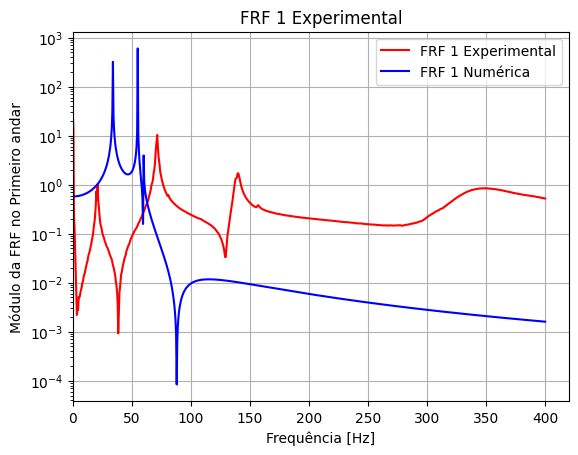

In [347]:
# Plotar gráfico da FRF do primeiro andar

plt.plot(freq, frf_1_andar, color='r', label='FRF 1 Experimental')

plt.plot(freq, FRF_primeira[:,0], color='b', label='FRF 1 Numérica')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no Primeiro andar')
plt.title('FRF 1 Experimental')
plt.grid()
plt.yscale('log')
plt.xlim(0)
plt.legend()
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_andar.png")
plt.show()

## Plotando a comparação entre a FRF no segundo andar Númerica e Experimental

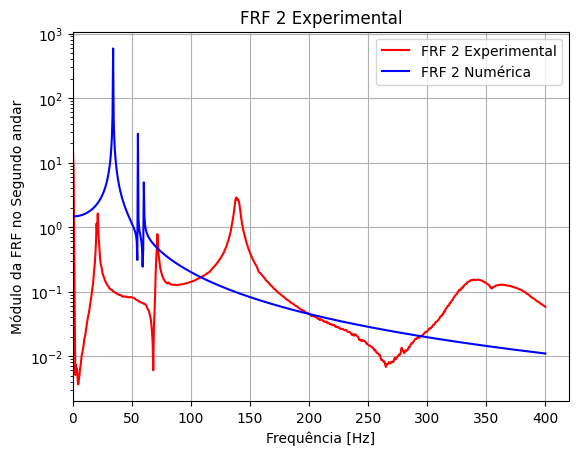

In [346]:
# Plotar gráfico da FRF do primeiro andar

plt.plot(freq, frf_2_andar, color='r', label='FRF 2 Experimental')

plt.plot(freq, FRF_primeira[:,1], color='b', label='FRF 2 Numérica')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no Segundo andar')
plt.title('FRF 2 Experimental')
plt.grid()
plt.yscale('log')
plt.xlim(0)
plt.legend()
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_andar.png")
plt.show()

## Plotando a comparação entre a FRF no terceiro andar Númerica e Experimental

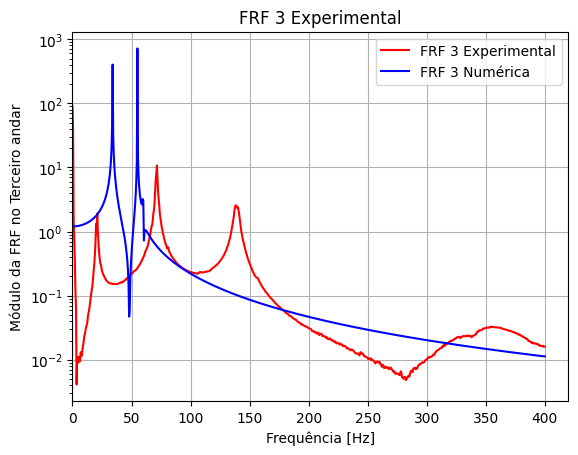

In [345]:
# Plotar gráfico da FRF do primeiro andar

plt.plot(freq, frf_3_andar, color='r', label='FRF 3 Experimental')

plt.plot(freq, FRF_primeira[:,2], color='b', label='FRF 3 Numérica')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Módulo da FRF no Terceiro andar')
plt.title('FRF 3 Experimental')
plt.grid()
plt.yscale('log')
plt.xlim(0)
plt.legend()
# plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_andar.png")
plt.show()